# Hyperparameter Tuning with Keras + Sklearn GridSearchCV

- https://chrisalbon.com/deep_learning/keras/tuning_neural_network_hyperparameters/

```python
# Load libraries
import numpy as np
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

```

- Must then write a function to create the model that accepts arguments for each parameter that you'd like to tune.

```python
def create_model(param1=9, param2='tanh',etc):
```

- Create a dictionary of parameter arguments to test 

```python
# Create HyperParameter Space
params_to_search ={'filter_size':[3,4,5,6],
                   'activation':['relu','tanh','linear'],
                   'n_filters':[100,200],#,300,400],
                  'dropout':[0.2],
                  'optimizer':['adam','rmsprop','adadelta'],
                'epochs':[10]}
```
- Then wrap the create function in the proper wrapper from `keras.wrappers.scikit_learn` (KerasClassifier, KerasRegressor) and instantiate the GridSearch

```python
neural_network = KerasClassifier(build_fn=create_model, param_grid=params_to_search)

grid = GridSearchCV(estimator=neural_network, param_grid=params_to_search)
grid_result = grid.fit(X_train, y_train)
best_params = grid_result.best_params_
```

- Note: You can Specify scoring function using the `scoring=` parameter

```python
def my_custom_scorer(y_true,y_pred, model=None, **kwargs):
    """My custom score function to use with sklearn's GridSearchCV
    Maximizes the average accuracy per class using a normalized confusion matrix"""
    from sklearn.metrics import make_scorer,confusion_matrix
    import numpy as np
    import functions_combined_BEST as ji    

    # set labels if provided
    if 'labels' in kwargs:
        labels = kwargs['labels']
    else:
        labels=np.unique(y_true)

    if y_true.ndim>1 or y_pred.ndim>1:

        ## reduce dimensions of y_train and y_test
        if y_true.ndim>1:            
            y_true = y_true.argmax(axis=1)
        if y_pred.ndim>1:
            y_pred = y_pred.argmax(axis=1)

    # Get confusion matrx
    cm = confusion_matrix(y_true, y_pred)

    # Normalize confusion matrix
    cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]

    ## Get diagonals for class accuracy
    diag = cm_norm.diagonal()
    score = np.mean(diag)
    print(f'Mean Class Accuracy = {score}')
    print(f'Class Accuracy Values:')
    print(diag)    

    ji.plot_confusion_matrix(cm,normalize=True)

    return score,cm_norm

## Using custom scoring function
from sklearn.metrics import make_scorer

grid = GridSearchCV(estimator=neural_network, 
                    param_grid=params_to_search,
                   scoring=make_scorer(my_custom_scorer)
grid_result = grid.fit(X_train, y_train)
```

# Imports, Function Def, Data Prep

In [2]:
## IMPORT CUSTOM CAPSTONE FUNCTIONS
import functions_combined_BEST as ji
import functions_io as io

from functions_combined_BEST import ihelp, ihelp_menu,\
reload, inspect_variables

## IMPORT MY PUBLISHED PYPI PACKAGE 
import bs_ds as  bs
from bs_ds.imports import *

## IMPORT CONVENIENCE/DISPLAY FUNCTIONS
from pprint import pprint
import ipywidgets as widgets

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

#Set pd.set_options for tweet visibility
pd.set_option('display.max_colwidth',100)
pd.set_option('display.max_columns',50)


from functions_combined_BEST import ihelp_menu2
# file_dict = ji.load_filename_directory()

np.random.seed(42)

## Adding Email Notification for Completion
- https://www.mssqltips.com/sqlservertip/5173/encrypting-passwords-for-use-with-python-and-sql-server/

In [3]:
# ## Import cryptography and generate encryption key
# from cryptography.fernet import Fernet
# key = Fernet.generate_key()
# print(key)

# ## Create the cipher_suit for encrypting/decrypting
# cipher_suite = Fernet(key)
# ciphered_text = cipher_suite.encrypt(b"")#password goes here
# print(ciphered_text)

# ## Test decryption
# unciphered_text = cipher_suite.decrypt(ciphered_text)
# # print(unciphered_text)


# ## Specify binary files (outside of repo) for storing key and password files
# filename_key ='C:/Users/james/Keys/gmail_key.bin' 
# with open(filename_key,'wb') as file:
#     file.write(key)
    
# filename_pwd ='C:/Users/james/Keys/gmail_pwd.bin' 
# with open(filename_pwd,'wb') as file:
#     file.write(ciphered_text)

In [4]:
# ## Test Loading and decrypting the password
# # filename_key ='C:/Users/james/Keys/gmail_key.bin' 
# # filename_pwd ='C:/Users/james/Keys/gmail_pwd.bin' 

# with open(filename_key,'rb') as file:
#     for line in file:
#         key = line

# from cryptography.fernet import Fernet
# cipher_suite = Fernet(key)

        
# with open(filename_pwd,'rb') as file:
#     for line in file:
#         encryptedpwd = line
        
# uncipher_text = (cipher_suite.decrypt(encryptedpwd))
# plain_text_encrypted_password = bytes(uncipher_text).decode('utf-8')
# # print(plain_text_encrypted_password)


### def email_notification

In [5]:
def email_notification(key_file ='C:/Users/james/Keys/gmail_key.bin', 
                       encrypted_pwd_file ='C:/Users/james/Keys/gmail_pwd.bin',
                       username='james.irving.phd@gmail.com',
                       subject ='GridSearch Complete',
                       msg='The GridSearch you started is now complete.'):
    """Sends email notification from gmail account using prevouisly encrypyter password.
    Loads encrypted key and password from previously exported cipher from cryptography.fernet"""
    import smtplib
    from email.message import EmailMessage
    from email.headerregistry import Address
    from email.utils import make_msgid
    from email.mime.multipart import MIMEMultipart
    from email.mime.text import MIMEText
    from email.mime.base import MIMEBase
    from email import encoders
    
    from cryptography.fernet import Fernet
    filename_encrypted_pwd =encrypted_pwd_file

    with open(key_file,'rb') as file:
        for line in file:
            key = line

    from cryptography.fernet import Fernet
    cipher_suite = Fernet(key)


    with open(encrypted_pwd_file,'rb') as file:
        for line in file:
            encryptedpwd = line
    uncipher_text = (cipher_suite.decrypt(encryptedpwd))
    plain_text_encrypted_password = bytes(uncipher_text).decode('utf-8')
    
    gmail_user = username
    gmail_password = plain_text_encrypted_password
    
    ## WRITE EMAIL
    message = MIMEMultipart()
    message['Subject'] =subject
    message['To'] = gmail_user
    message['From']=gmail_user
    body = msg
    message.attach(MIMEText(body,'plain'))
    text_message = message.as_string()


    # emails end request
    try:
        with  smtplib.SMTP_SSL('smtp.gmail.com',465) as server:
    #         server.ehlo()
            server.login(gmail_user,gmail_password)
            server.sendmail(gmail_user,gmail_user, text_message)
            server.close()
            print('Email sent!')

        
    except Exception as e:
        print(e)
        print('Something went wrong')

### def my_custom_scorer

In [6]:
def my_custom_scorer(y_true,y_pred, model=None, **kwargs):
    """My custom score function to use with sklearn's GridSearchCV
    Maximizes the average accuracy per class using a normalized confusion matrix
    [i] Note: To use my_custom_scorer in GridSearch:
    >> from sklearn.metrics import make_scorer
    >> grid = GridSearch(estimator, parameter_grid)
    """
    from sklearn.metrics import make_scorer,confusion_matrix
    import numpy as np
    import functions_combined_BEST as ji    

    # set labels for confusion matrix
    labels = ['Decrease','No Change', 'Increase']

    
    ## If y_true is a multi-column one-hotted target
    if y_true.ndim>1 or y_pred.ndim>1:

        ## reduce dimensions of y_train and y_test
        if y_true.ndim>1:            
            y_true = y_true.argmax(axis=1)
            
        if y_pred.ndim>1:
            y_pred = y_pred.argmax(axis=1)

    
    ## Get confusion matrx
    cm = confusion_matrix(y_true, y_pred)

    ## Normalize confusion matrix
    cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]

    ## Get diagonals for class accuracy
    diag = cm_norm.diagonal()
    score = np.mean(diag)
    
    
    ## Display results for user
    print(f'Mean Class Accuracy = {score}')
    print(f'Class Accuracy Values:')
    print(diag)    

    ## Plot confusion matrix
    ji.plot_confusion_matrix(cm,normalize=True,classes=labels);

    return score

## Load Data

In [8]:
df_sampled = pd.read_csv('shared_memory/df_sampled_test_nlp_models.csv',index_col=0,parse_dates=True)
df_sampled.dropna(inplace=True)
df_sampled.head()

,delta_price_class,delta_price,pre_tweet_price,post_tweet_price,delta_time,B_ts_rounded,B_ts_post_tweet,content,content_min_clean,cleaned_stopped_content,cleaned_stopped_tokens,cleaned_stopped_lemmas,delta_price_class_int
date,,,,,,,,,,,,,
2019-08-23 14:59:04,neg,-0.49,112.77,112.28,0 days 01:00:00.000000000,2019-08-23 14:59:00,2019-08-23 15:59:00,....your companies HOME and making your products in the USA. I will be responding to China’s Tar...,your companies home and making your products in the usa i will be responding to china’s tar...,companies home making products usa responding china tariffs afternoon opportunity united states ...,"['companies', 'home', 'making', 'products', 'usa', 'responding', 'china', 'tariffs', 'afternoon'...",company home making product usa responding china tariff afternoon opportunity united state also ...,0
2019-08-23 14:59:04,neg,-0.49,112.77,112.28,0 days 01:00:00.000000000,2019-08-23 14:59:00,2019-08-23 15:59:00,....better off without them. The vast amounts of money made and stolen by China from the United ...,better off without them the vast amounts of money made and stolen by china from the united ...,better without vast amounts money made stolen china united states year year decades must stop am...,"['better', 'without', 'vast', 'amounts', 'money', 'made', 'stolen', 'china', 'united', 'states',...",better without vast amount money made stolen china united state year year decade must stop ameri...,0
2019-08-23 14:57:40,neg,-0.78,112.74,111.96,0 days 01:00:00.000000000,2019-08-23 14:58:00,2019-08-23 15:58:00,....My only question is who is our bigger enemy Jay Powell or Chairman Xi?,my only question is who is our bigger enemy jay powell or chairman xi,question bigger enemy jay powell chairman xi,"['question', 'bigger', 'enemy', 'jay', 'powell', 'chairman', 'xi']",question bigger enemy jay powell chairman xi,0
2019-08-23 14:57:40,neg,-0.78,112.74,111.96,0 days 01:00:00.000000000,2019-08-23 14:58:00,2019-08-23 15:58:00,As usual the Fed did NOTHING! It is incredible that they can “speak” without knowing or asking w...,as usual the fed did nothing it is incredible that they can “speak” without knowing or asking w...,usual fed nothing incredible speak without knowing asking announced shortly strong dollar weak f...,"['usual', 'fed', 'nothing', 'incredible', 'speak', 'without', 'knowing', 'asking', 'announced', ...",usual fed nothing incredible speak without knowing asking announced shortly strong dollar weak f...,0
2019-08-23 14:57:40,neg,-0.78,112.74,111.96,0 days 01:00:00.000000000,2019-08-23 14:58:00,2019-08-23 15:58:00,....My only question is who is our bigger enemy Jay Powell or Chairman Xi?,my only question is who is our bigger enemy jay powell or chairman xi,question bigger enemy jay powell chairman xi,"['question', 'bigger', 'enemy', 'jay', 'powell', 'chairman', 'xi']",question bigger enemy jay powell chairman xi,0


[i] Loading Word2Vec model from models/word2vec/word2vec_model.pkl


4681

In [11]:
df_sampled.isna().sum()

delta_price_class          0
delta_price                0
pre_tweet_price            0
post_tweet_price           0
delta_time                 0
B_ts_rounded               0
B_ts_post_tweet            0
content                    0
content_min_clean          0
cleaned_stopped_content    0
cleaned_stopped_tokens     0
cleaned_stopped_lemmas     0
delta_price_class_int      0
dtype: int64

## Tokenize and train/test/val split

In [12]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import text, sequence
from keras.utils import to_categorical

## Specify text data series
text_data = df_sampled['cleaned_stopped_lemmas']

# Changed for class imblanace  #
y = to_categorical(df_sampled['delta_price_class_int'],num_classes=3)
print(f'y.shape={y.shape}')

## Instantiate and fit Tokenizer
tokenizer = Tokenizer(num_words=len(wv.vocab))
tokenizer.fit_on_texts(text_data)

# return integer-encoded sentences
X = tokenizer.texts_to_sequences(text_data)
X = sequence.pad_sequences(X)

MAX_SEQUENCE_LENGTH = X.shape[1]
print(f'Sequence length: {MAX_SEQUENCE_LENGTH}')

## Save word indices
word_index = tokenizer.index_word
reverse_index = {v:k for k,v in word_index.items()}

Using TensorFlow backend.


y.shape=(2670, 3)
Sequence length: 33


In [13]:
## Get training/test split
X_train, X_test,X_val, y_train, y_test,y_val = ji.train_test_val_split(X, y, test_size=0.15, val_size=0.15)

# ji.check_y_class_balance(data=[y_train,y_test])
print('Training Data:')
print(X_train.shape, y_train.shape)
print('Test Data:')
print(X_test.shape, y_test.shape)
print('Val Data:')
print(X_val.shape, y_val.shape)

Training Data:
(1869, 33) (1869, 3)
Test Data:
(400, 33) (400, 3)
Val Data:
(401, 33) (401, 3)


### def load_glove_embedding_layer

In [15]:
def load_glove_embedding_layer(fp=None, trainable=False):
    if fp is None:
        fp = None#r'D:\Users\James\Dropbox (Personal)\CODING\DATASETS\embeddings\glove.twitter.27B.100d.txt'

    ## Make GloVe embedding matrix
    word2index, embedding_matrix_gl = ji.load_glove_embeddings(fp=fp,encoding='utf-8',embedding_dim=100)
    print(f'gl:\n\tshape={embedding_matrix_gl.shape}')

    from keras import layers         
    vocab_size = embedding_matrix_gl.shape[0]#len(wv.vocab)
    vector_size = embedding_matrix_gl.shape[1]#wv.vector_size

    embedding_layer_gl =layers.Embedding(vocab_size,#+1,
                                      vector_size,
                                      input_length=X_train.shape[1],
                                      weights=[embedding_matrix_gl],
                                      trainable=trainable)
    return word2index, embedding_layer_gl

## Attempt to load GloVe Vectors
try:
    ## Load in GloVe Vectors for Embedding Layer
    glove_word2index, embedding_layer = load_glove_embedding_layer(trainable=False)

except:
    
    ## If user doesn't have glove files, use word2vec instead
    ## Load in word2vec if want to use for embedding layer
    word2vec = ji.load_word2vec('models/word2vec/word2vec_model.pkl')
    wv = word2vec.wv
    print(len(wv.vocab))
    
    embedding_layer = ji.make_keras_embedding_layer(word2vec_model=word2vec,X_sequences=X)

[i] Loading Word2Vec model from models/word2vec/word2vec_model.pkl
4681
embedding_matrix.shape = (4682, 300)


# Modeling

## CNN Model 1

In [16]:
def create_model(embedding_layer=embedding_layer,trainable=False,
              n_filters=128, filter_size=4,
              activation='relu', optimizer='rmsprop',
              dropout=0.2,l2_lr=0.01,
              batch_size=100,
              epochs=10,verbose = 1,show_summary=False):
    
    ## Print out parameters used to create model for user
    vars = locals()
    dashes = '---'*20
    print('\n\n')
    print(dashes)
    now = pd.datetime.now()
    print(now.strftime('%m/%d/%Y-%T'))
    print(vars)    
    
    
    ## Create network architetcture
    from keras.layers import Input, Conv1D,GlobalMaxPooling1D, MaxPooling1D, Dense, Dropout
    from keras.models import Model
    from keras.regularizers import l2

    print('Training model.')
    MAX_SEQUENCE_LENGTH = X_train.shape[1]

    
    ## Get Input sequences from embedding_layer
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    ## Specify layer parameters


    ## Conv Layer 1
    x = Conv1D(n_filters, filter_size, activation=activation, data_format='channels_first',
               kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(embedded_sequences)
    
    x = Dropout(dropout)(x)
    x = MaxPooling1D(filter_size)(x)
    
    ## Conv Layer 2
    x = Conv1D(n_filters, filter_size, activation=activation,data_format='channels_first',
              kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(x) 
    x = Dropout(dropout)(x)
    x = MaxPooling1D(filter_size)(x)
    
    ## Conv Layer 3
    x = Conv1D(n_filters, filter_size, activation=activation,data_format='channels_first',
              kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(x) 
    x = Dropout(dropout)(x)
    x = GlobalMaxPooling1D()(x)
    
    ## Classification Layer
    x = Dense(n_filters, activation=activation )(x) #128'relu'
    preds = Dense(3, activation='softmax')(x)

    
    ## Create and compile model 
    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer, #'rmsprop',#adam
                  metrics=['acc'])
    
    if show_summary:
        display(model.summary())
    return model

## Using Keras Model with GridSearchCV

In [19]:
## Wrapping the model in the `KerasClassifier` wrapper
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

## Wrap create_model with KerasClassifier
neural_network = KerasClassifier(build_fn=create_model,verbose=1)    

# Create HyperParaemeter Space
params_to_search ={'filter_size':[2,4,6],
                   'activation':['relu','tanh','linear'],
                   'n_filters':[100,200],#,300,400],
                  'dropout':[0.2,0.4],
                  'optimizer':['adam','rmsprop','adadelta'],
                'epochs':[10]}

--- CLOCK STARTED @:    09/30/19 - 11:46:15 AM --- 



------------------------------------------------------------
09/30/2019-11:46:15
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.01, 'dropout': 0.2, 'optimizer': 'adam', 'activation': 'relu', 'filter_size': 2, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x000001D32D653B70>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 4s 3ms/step - loss: 2.4564 - acc: 0.3283
Epoch 2/10
1246/1246 [==============================] - 3s 2ms/step - loss: 1.7180 - acc: 0.3291
Epoch 3/10
1246/1246 [==============================] - 3s 3ms/step - loss: 1.3558 - acc: 0.3459
Epoch 4/10
1246/1246 [==============================] - 3s 3ms/step - loss: 1.1982 - acc: 0.3226
Epoch 5/10
1246/1246 [==============================] - 3s 3ms/step - loss: 1.1354 - acc: 0.3459
Epoch 6/10
1246/1246 [==============================] - 3s 3ms/step - loss: 1

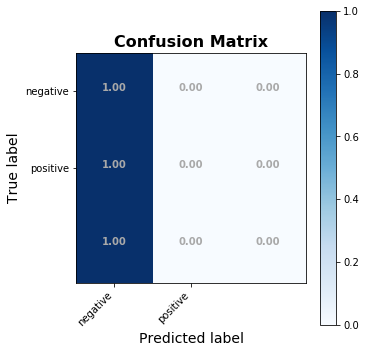

1246/1246 [==============================] - 1s 685us/step
Mean Class Accuracy = 0.3333333333333333
Class Accuracy Values:
[1. 0. 0.]


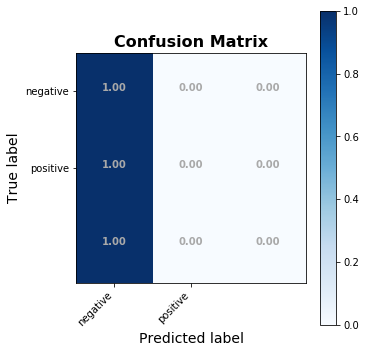




------------------------------------------------------------
09/30/2019-11:46:50
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.01, 'dropout': 0.2, 'optimizer': 'adam', 'activation': 'relu', 'filter_size': 2, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x000001D32D653B70>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 4s 3ms/step - loss: 2.4122 - acc: 0.3307
Epoch 2/10
1246/1246 [==============================] - 3s 3ms/step - loss: 1.6632 - acc: 0.3307
Epoch 3/10
1246/1246 [==============================] - 3s 3ms/step - loss: 1.3160 - acc: 0.3379
Epoch 4/10
1246/1246 [==============================] - 4s 3ms/step - loss: 1.1751 - acc: 0.3403
Epoch 5/10
1246/1246 [==============================] - 3s 3ms/step - loss: 1.1240 - acc: 0.3098
Epoch 6/10
1246/1246 [==============================] - 3s 3ms/step - loss: 1.1062 - acc: 0.3258
Epoch 7/10
1246/1246 [==========

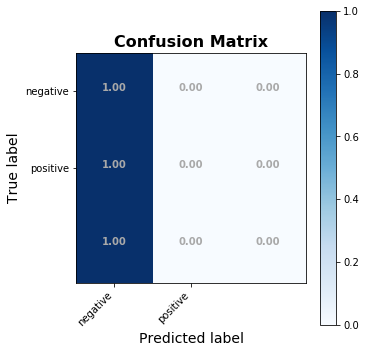

1246/1246 [==============================] - 1s 730us/step
Mean Class Accuracy = 0.3333333333333333
Class Accuracy Values:
[1. 0. 0.]


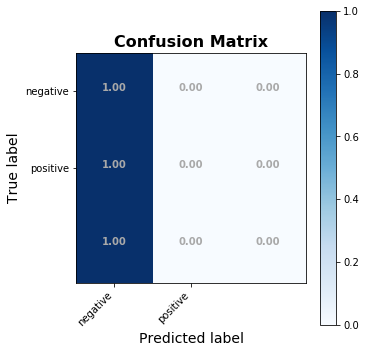




------------------------------------------------------------
09/30/2019-11:47:27
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.01, 'dropout': 0.2, 'optimizer': 'adam', 'activation': 'relu', 'filter_size': 2, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x000001D32D653B70>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 4s 3ms/step - loss: 2.4177 - acc: 0.3026
Epoch 2/10
1246/1246 [==============================] - 3s 3ms/step - loss: 1.6711 - acc: 0.3234
Epoch 3/10
1246/1246 [==============================] - 3s 3ms/step - loss: 1.3213 - acc: 0.3331
Epoch 4/10
1246/1246 [==============================] - 3s 3ms/step - loss: 1.1775 - acc: 0.3387
Epoch 5/10
1246/1246 [==============================] - 3s 3ms/step - loss: 1.1246 - acc: 0.3234
Epoch 6/10
1246/1246 [==============================] - 3s 3ms/step - loss: 1.1067 - acc: 0.3202
Epoch 7/10
1246/1246 [==========

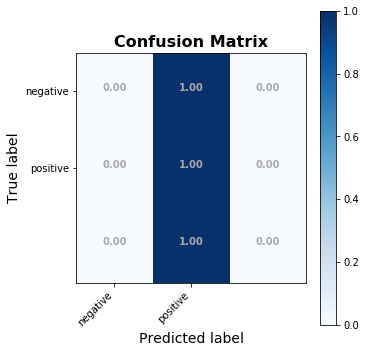

1246/1246 [==============================] - 1s 695us/step
Mean Class Accuracy = 0.3333333333333333
Class Accuracy Values:
[0. 1. 0.]


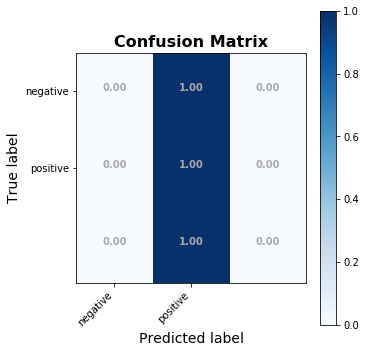




------------------------------------------------------------
09/30/2019-11:48:03
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.01, 'dropout': 0.2, 'optimizer': 'rmsprop', 'activation': 'relu', 'filter_size': 2, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x000001D32D653B70>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 4s 3ms/step - loss: 2.2607 - acc: 0.3363
Epoch 2/10
1246/1246 [==============================] - 3s 3ms/step - loss: 1.5453 - acc: 0.3210
Epoch 3/10
1246/1246 [==============================] - 3s 3ms/step - loss: 1.2105 - acc: 0.3218
Epoch 4/10
1246/1246 [==============================] - 3s 3ms/step - loss: 1.1113 - acc: 0.3307
Epoch 5/10
1246/1246 [==============================] - 4s 3ms/step - loss: 1.0989 - acc: 0.3443
Epoch 6/10
1246/1246 [==============================] - 4s 3ms/step - loss: 1.0995 - acc: 0.3459
Epoch 7/10
1246/1246 [=======

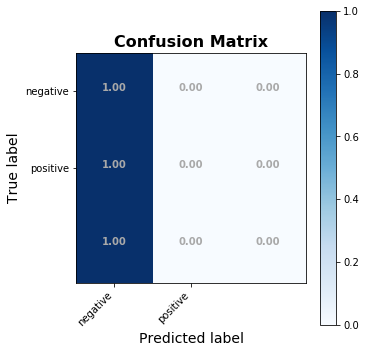

1246/1246 [==============================] - 1s 766us/step
Mean Class Accuracy = 0.3333333333333333
Class Accuracy Values:
[1. 0. 0.]


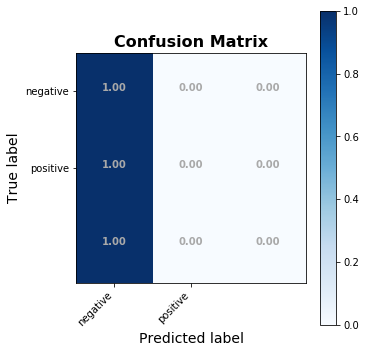




------------------------------------------------------------
09/30/2019-11:48:41
{'show_summary': False, 'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.01, 'dropout': 0.2, 'optimizer': 'rmsprop', 'activation': 'relu', 'filter_size': 2, 'n_filters': 100, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x000001D32D653B70>}
Training model.
Epoch 1/10
1246/1246 [==============================] - 4s 3ms/step - loss: 2.2552 - acc: 0.3170
Epoch 2/10
1246/1246 [==============================] - 3s 3ms/step - loss: 1.5313 - acc: 0.3250
Epoch 3/10
1246/1246 [==============================] - 3s 2ms/step - loss: 1.2043 - acc: 0.3315
Epoch 4/10
1246/1246 [==============================] - 3s 3ms/step - loss: 1.1096 - acc: 0.3250
Epoch 5/10
1246/1246 [==============================] - 3s 3ms/step - loss: 1.0995 - acc: 0.3483
Epoch 6/10
1246/1246 [==============================] - 3s 3ms/step - loss: 1.0998 - acc: 0.3226
Epoch 7/10
 704/1246 [=======

KeyboardInterrupt: 

In [20]:
## Run GridSearch
tune_clock = bs.Clock()

grid = GridSearchCV(estimator=neural_network,param_grid=params_to_search, scoring=make_scorer(ji.my_custom_scorer))

tune_clock.tic()
grid_result = grid.fit(X_train, y_train)
tune_clock.toc()

## Print Best Params
best_params = grid_result.best_params_
print(best_params)

## Send Email with completion time and best parameters found. 
time_completed = pd.datetime.now()
fmt = '%m/%d%Y-%T'
msg = f"GridSearch Completed at {time_completed.strftime(fmt)}\n GridSearchResults:\n{best_params}"
email_notification(msg=msg)

## Now Run Best Params on Their Own

In [ ]:
model = create_model(embedding_layer_gl,**grid_result.best_params_)
model.summary()

In [ ]:
## set params
num_epochs = 10
# validation_split = 0.2


clock = bs.Clock()
clock.tic()
dashes = '---'*20
print(f"{dashes}\n\tFITTING MODEL:\n{dashes}")

history = model.fit(X_train, y_train, 
                      epochs=num_epochs,
                      verbose=True, 
                      validation_data=(X_val,y_val),#validation_split=validation_split,
                      batch_size=100)#,
#                       callbacks=callbacks)

clock.toc()

df_report,fig=ji.evaluate_classification(model,history,
                                                   X_train, X_test,
                                                   y_train, y_test, 
                                                   report_as_df=False,
                                                   binary_classes=False,
                                                   conf_matrix_classes=['Decrease','No Change','Increase'])

___


## Older Parameters

```python
# Create HyperParaemeter Space
params_to_search ={'filter_size':[3,4,5,6],
                   'activation':['relu','tanh','linear'],
                   'n_filters':[100,200],#,300,400],
                  'dropout':[0.2],
                  'optimizer':['adam','rmsprop','adadelta'],
                'epochs':[10]}


create_model(embedding_layer=embedding_layer_gl,trainable=False,
              n_filters=100, filter_size=4,
              activation='tanh', optimizer='adadelta',
              dropout=0.2,l2_lr=0.01,
              batch_size=100,
              epochs=10,verbose = 0,show_summary=False)
  ...

best results:
{'activation': 'tanh',
 'dropout': 0.2,
 'epochs': 10,
 'filter_size': 4,
 'n_filters': 100,
 'optimizer': 'adadelta'}
```

## CNN + Dense Layers

## CNN Deep Model

In [ ]:

def create_deep_model(embedding_layer=embedding_layer_gl,trainable=False,
                       n_conv_layers=3,n_filters=128, filter_size=4,
                      activation='tanh', optimizer='adadelta',
                      dropout=0.2,l2_lr=0.005,
                      batch_size=100,
                      epochs=10,verbose = 1):
    
    vars = locals()
    dashes = '---'*20
    print('\n\n')
    print(dashes)
    now = pd.datetime.now()
    print(now.strftime('%m/%d/%Y-%T'))
    print(vars)    
    
    embedding_layer.trainable=trainable
    print(f'Embedding layer trainable={embedding_layer.trainable}')
    from keras.layers import Input, Conv1D,GlobalMaxPooling1D, MaxPooling1D, Dense, Dropout
    from keras.models import Model
    from keras.regularizers import l2

    print('Training model.')
    MAX_SEQUENCE_LENGTH = X_train.shape[1]

    # train a 1D convnet with global maxpooling
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    ## Specify layer parameters


    ##
    x = Conv1D(n_filters, filter_size, activation=activation, #data_format='channels_first',
               kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(embedded_sequences)
    
    x = Dropout(dropout)(x)
    x = MaxPooling1D(filter_size)(x)
    
    
    
    ## Loop to create n_conv_layers
    
    for n in range(n_conv_layers):
        x = Conv1D(n_filters, filter_size, activation=activation,data_format='channels_first',
                   kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(x) 
        x = Dropout(dropout)(x)
        
        if n==n_conv_layers-1:
            x = GlobalMaxPooling1D()(x)
        else:
            x = MaxPooling1D(filter_size)(x)
    
# #     ##
#     x = Conv1D(n_filters, filter_size, activation=activation,data_format='channels_first',
#               kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(x) 
#     x = Dropout(dropout)(x)
#     x = GlobalMaxPooling1D()(x)
    
    ##
    x = Dense(n_filters, activation=activation )(x) #128'relu'
    preds = Dense(3, activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer, #'rmsprop',#adam
                  metrics=['acc'])
    
#     if show_summary:
#     print()
    display(model.summary())
    return model



In [ ]:
from sklearn.model_selection import GridSearchCV
tune_clock = bs.Clock()
from keras import models, layers
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

neural_network_deep = KerasClassifier(build_fn=create_deep_model,verbose=1)

params_deep_model={'n_conv_layers':[3,5],
                  'n_filters': [100,200],
                 'l2_lr':[0.005,0.01],
                  'epochs':[10]}
# params_deep_model={'activation': ['tanh'], 
#                    'n_conv_layers':[3,5],
#                   'dropout': [0.2],
#                   'epochs': [10],#,20]
#                   'filter_size': [4],
#                   'batch_size':[100],
#                   'n_filters': [100,200],
#                   'optimizer': ['adadelta'],
#                  'l2_lr':[0.005,0.01]}
grid = GridSearchCV(estimator=neural_network_deep,param_grid=params_deep_model)#,
#                    n_jobs=3)
print(params_deep_model)

tune_clock.tic()
grid_result = grid.fit(X_train, y_train)
tune_clock.toc()